<a href="https://colab.research.google.com/github/adamgrzanek/Simple_multi_label_classification/blob/main/multi_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple model to classify vehicles images. 

The model was trained on 6 labels: 
black/red bicycle, 
black/red car, 
blue/red motorcycle.



File to load:

- mlc.hdf5

- mlc.pickle

- example images

In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import numpy as np
import pickle
import imutils
import cv2

In [2]:
def load(filename):
    '''Simple function to prepare image'''
    image = cv2.imread(filename)
    image = cv2.resize(image, (150, 150))
    image = image.astype('float') / 255.
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    return image

In [3]:
# Loading model
model = load_model('mlc.hdf5')

In [38]:
# Load image
image_path = 'black_bicycle_1.png' # type path to image
image = load(image_path)

1/1 [==============================] - 0s 21ms/step


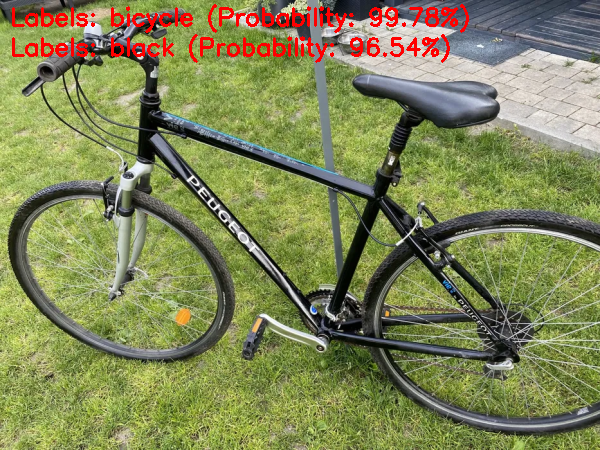

In [39]:
# Prediction
y_pred = model.predict(image)[0]


# Loading labels
with open(r'mlc.pickle', 'rb') as file:
    mlc = pickle.loads(file.read())

labels = dict(enumerate(mlc.classes_))    
idxs = np.argsort(y_pred)[::-1]



# Displaying image
image = cv2.imread(image_path)
image = imutils.resize(image, width=600)

for i, idx in enumerate(idxs[:2]):
    cv2.putText(img=image, text=f'Labels: {labels[idx]} (Probability: {y_pred[idx] * 100:.2f}%)',
                org=(10, (i * 30) + 25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8,
                color=(0, 0, 255), thickness=2)

cv2_imshow(image)